# Univariate Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format #supress scientific notation
plt.rcParams['figure.figsize'] = (16,8)

## Data Munging
- Transformation of raw data to usefull format
- Many datasets are not available for analysis
- Data needs to be transformed or cleaned first
- This process is the most difficult and time consuming

## Features of a data set

![](figures/variables.png)

Dependent variable is the variable that we are interested in predicting and the independent variables are the variables wich may or may not help to predict the dependent variable

![](figures/variables2.png)

## Data Munging tasks include
   - Renanimg Variables
   - Data type conversion
   - Encoding, Decoding and recording data
   - Merging datasets
   - Transforming data
   - Handling missing data
   - Handling anomolous data

In [5]:
loan = pd.read_csv("data/train.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,"2,358.00",120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Variable Identification
First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

Example:- Suppose, we want to predict, whether the loan will be paid or not (refer above data set). Here you need to identify predictor variables, target variable, data type of variables and category of variables.


![](figures/variable-identification.PNG)

## Descriptive Statistics (Non graphical Methods)
> - Describe the data in a qualitative or quantitative manner
> - Provides a summary of the shape of the data
> - These statistics help us to understand when transformations, imputations, and removal of outliers are necessary prior to model building

A. Location (Central Tendency)
> - It describes where most of the data points fall. The key measures include:

1. Mean (Average): Sum of all values divided by the number of values.

2. Median: Middle value when data is sorted.

3. Mode: Most frequently occurring value.

B. Variability (Spread)
> - It describes how much the data varies. The key measures include:

1. Range: Difference between the highest and lowest values.

2. Variance: Average squared difference from the mean.

3. Standard Deviation: Square root of variance, showing how spread-out data points are.

4. Interquartile Range (IQR): Difference between the 75th percentile (Q3) and the 25th percentile (Q1), helping detect outliers.

Note: Statistics is essentialy the study of what causes variability in the data

we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

### Continuous Variables:

In case of continuous variables, we need to understand the central tendency and spread of the variable
![](figures/continous.PNG)

In [6]:
loan[['ApplicantIncome']].describe()

,ApplicantIncome
count,614.00
mean,"5,403.46"
std,"6,109.04"
min,150.00
25%,"2,877.50"
50%,"3,812.50"
75%,"5,795.00"
max,"81,000.00"


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

- Mean: The sum of the observations divided by the total number of observations. Most common indicator of central tendency of a variable
- Median: To get the median, we need to sort the data from lowest to highest. The median is the number in the middle of the data
- Mode : Refers to the most frequent of commonly occuring number within the variable 
- Variance: Measures the dispersion of the data from the mean.
- Standard Deviation: is the square root of the variance. This indicates how close the data is to the mean
- Range: is the measure of dispersion . Difference between the larget and the smallest values.

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [7]:
loan[['Credit_History','Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome']].describe()

,Credit_History,Loan_Amount_Term,LoanAmount,CoapplicantIncome,ApplicantIncome
count,564.00,600.00,592.00,614.00,614.00
mean,0.84,342.00,146.41,"1,621.25","5,403.46"
std,0.36,65.12,85.59,"2,926.25","6,109.04"
min,0.00,12.00,9.00,0.00,150.00
25%,1.00,360.00,100.00,0.00,"2,877.50"
50%,1.00,360.00,128.00,"1,188.50","3,812.50"
75%,1.00,360.00,168.00,"2,297.25","5,795.00"
max,1.00,480.00,700.00,"41,667.00","81,000.00"


#### Histograms
 Graphical display of data using bars of different heights.This allows us to evaluate the shape of the underlying distribution.It is a bar chart that groups numbers into ranges or bins
 ![](figures/hist-a.PNG)

data can be distributed (spread out) in many different ways
![](figures/hist-b.PNG)

#### Normal Distribution
Data tends to be around a central value with no bias left ot right
 ![](figures/bell.PNG)
The bell curve is a normal distribution . The yellow histogram shows some data that follows it closely, but not perfectly

Many things follow a normal distribution:
- Height of People
- Size of things produced by machines
- Errors in measurements
- Blood Pressure
- Academic Test Scores
- Qunicunx (Plinko)

We say that data is normally distributed when
the histogram has:
- Mean = Median = Mode
- Symmetry around the center
- 50% of the values less than the mean and 50% greater than the mean.
 ![](figures/bell-b.PNG)


- The number of standard deviations from the mean is also called the standard score or z-score.
- We can take any normal distribution and convert to the standard normal distribution.
- To convert a value to the Z-score:
    - First subtract the mean.
    - Then divide by the standard deviation.
- Standardizing helps us make decisions about the data and makes our life easier by only having to refer to a single table for statistical testing.

 ![](figures/bell-c.PNG)

There are other moments about the mean, skewness and kurtosis, that can used to understand what distribution should be used when there are 3 or more parameters to estimate.
 ![](figures/bell-d.PNG)


#### Skeweness
> The Skewness statistic refers to the lopsidedness of the distribution. If a distribution has a negative Skewness (sometimes described as left skewed) it has a longer tail to the left than to the right. A positively skewed distribution (right skewed) has a longer tail to the right, and zero skewed distributions are usually symmetric.

**Interpretation:**
- Skewness &> 0 - Right skewed distribution - most values are concentrated on left of the mean, with extreme values to the right.
- Skewness < 0 - Left skewed distribution - most values are concentrated on the right of the mean, with extreme values to the left.
- Skewness = 0 - mean = median, the distribution is symmetrical around the mean.
 ![](figures/skeness.PNG)


#### Kurtosis
- Kurtosis is an indicator used in distribution analysis as a sign of flattening or &peakedness& of a distribution.
-  The Kurtosis is calculated from the following

- Interpretation:
    > - Kurtosis &> 3 - Leptokurtic distribution, sharper than a normal distribution, with values concentrated around the mean and longer tails.This means high probability for extreme values.
    > - Kurtosis < 3 - Platykurtic distribution, flatter than a normal distribution with a wider peak. The probability for extreme values is less than for a normal distribution, and the values are wider spread around the mean.
    > - Kurtosis = 3 - Mesokurtic distribution - normal distribution for example.
 ![](figures/skeness-b.PNG)

The following table gives some examples of skewness and kurtosis for common distributions.
 ![](figures/other-dist.PNG)
Here are some examples of other common distributions you may encounter:
 ![](figures/other-dist-b.PNG)

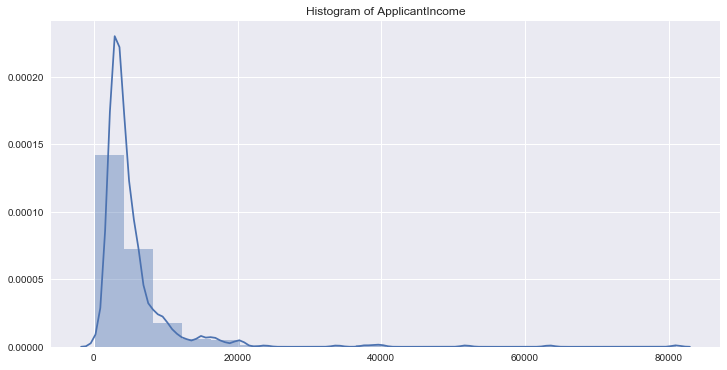

In [8]:
fig, ax = plt.subplots()
ax.set(title ="Histogram of ApplicantIncome")
sns.distplot(a=loan[["ApplicantIncome"]], bins=20)

####  Boxplot 
is a nice way to graphically represent the data in order to communicate the data through their quartiles.
![](figures/box.PNG)
 
![](figures/box-b.PNG)



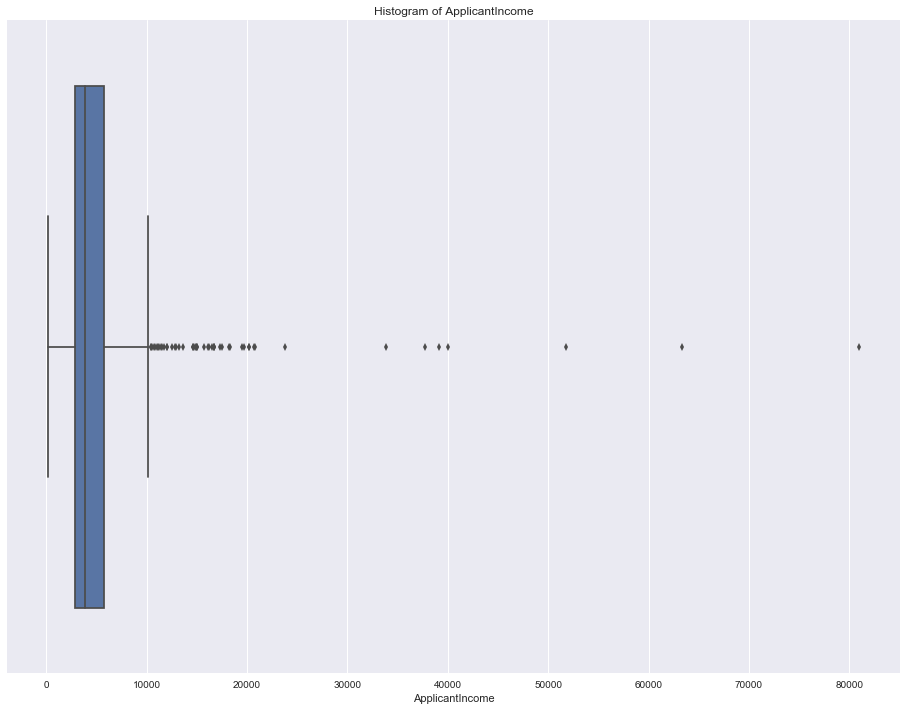

In [17]:
fig, ax = plt.subplots()
ax.set(title ="Histogram of ApplicantIncome")
sns.boxplot(x="ApplicantIncome", data=loan)

### Categorical Variables:
For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `LoanStatus`:

In [11]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

422 users out of 614 pay their loans; their `loan status` value is `Y`. To calculate the proportion, pass `normalize=True` to the `value_counts` function.

In [13]:
loan['Loan_Status'].value_counts(normalize=True)

Y   0.69
N   0.31
Name: Loan_Status, dtype: float64

#### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:

In [21]:
pd.crosstab(loan['Loan_Status'], loan['Education'])

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


In [23]:
pd.crosstab(loan['Loan_Status'], loan['Married'], normalize=True)

Married,No,Yes
Loan_Status,,
N,0.13,0.18
Y,0.22,0.47


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` - a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` — what statistics we need to calculate for groups - e.g sum, mean, maximum, minimum or something else.

Let’s take a look at the average number of day, evening, and night calls by area code:

In [24]:
loan.pivot_table(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
               ['Loan_Amount_Term'], aggfunc='mean')

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Amount_Term,,,
12.00,"4,625.00","2,857.00",111.00
36.00,"3,419.50",0.00,117.50
60.00,"5,032.50","2,850.50",140.00
84.00,"4,128.50","1,093.50",132.25
120.00,"2,792.67",362.00,22.33
180.00,"6,927.89","2,556.15",147.52
240.00,"5,907.75",0.00,118.33
300.00,"8,184.92","2,280.38",185.15
360.00,"5,298.08","1,562.26",147.25


### Visualize

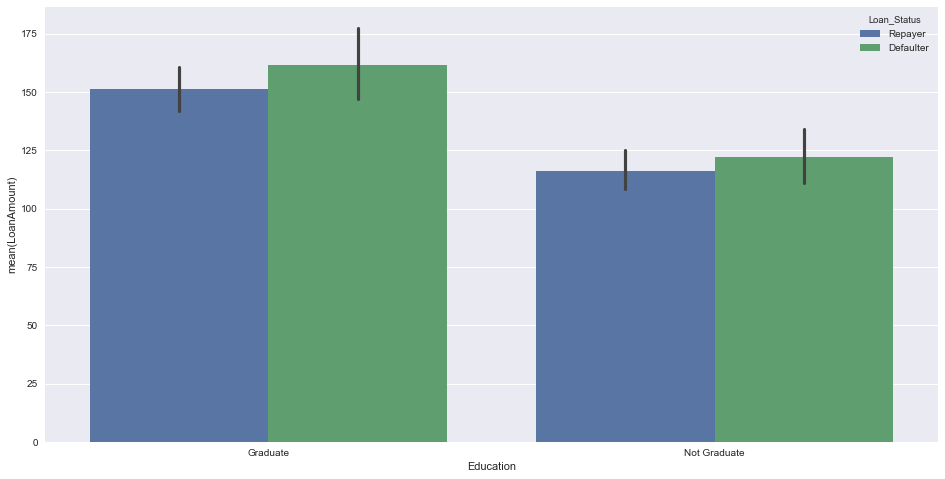

In [58]:

sns.barplot(x='Education',y='LoanAmount', hue='Loan_Status',data=loan)

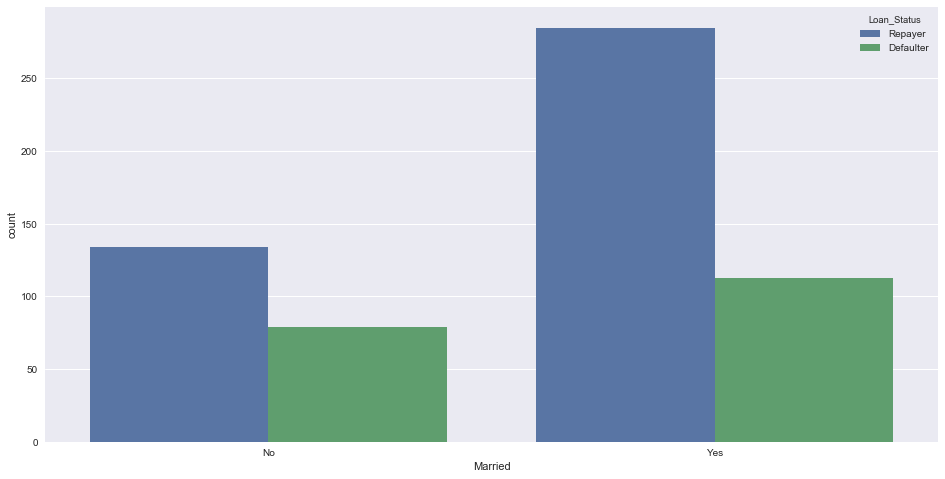

In [60]:
sns.countplot(x='Married', hue='Loan_Status', data=loan);


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by Total day charge (use `ascending=False` to sort in descending order):

In [16]:
loan.sort_values(by='ApplicantIncome', ascending=False).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.00,360.00,360.00,0.00,Rural,N
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.00,490.00,180.00,1.00,Urban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.00,700.00,300.00,1.00,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.00,600.00,180.00,0.00,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,"4,750.00",120.00,360.00,1.00,Semiurban,Y


Alternatively, we can also sort by multiple columns:

In [17]:
loan.sort_values(by=['Loan_Status', 'ApplicantIncome'],ascending=[True, False]).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.00,360.00,360.00,0.00,Rural,N
183,LP001637,Male,Yes,1,Graduate,No,33846,0.00,260.00,360.00,1.00,Semiurban,N
284,LP001922,Male,Yes,0,Graduate,No,20667,0.00,nan,360.00,1.00,Rural,N
308,LP001996,Male,No,0,Graduate,No,20233,0.00,480.00,360.00,1.00,Rural,N
369,LP002191,Male,Yes,0,Graduate,No,19730,"5,266.00",570.00,360.00,1.00,Rural,N



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**

In [50]:
loan_num = loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.00,nan
1,4583,"1,508.00",128.00
2,3000,0.00,66.00
3,2583,"2,358.00",120.00
4,6000,0.00,141.00
...,...,...,...
609,2900,0.00,71.00
610,4106,0.00,40.00
611,8072,240.00,253.00
612,7583,0.00,187.00


In [52]:
loan_num.apply(np.max) #only for numerical values

ApplicantIncome     81,000.00
CoapplicantIncome   41,667.00
LoanAmount             700.00
dtype: float64

The `apply` method can also be used to apply a function to each line. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all education starting with G, we can do it like this:

In [45]:
loan[loan['Education'].apply(lambda education: education[0] == 'G')].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,nan,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,"4,196.00",267.00,360.00,1.00,Urban,Y


The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [54]:
#create a copy
loan_new = loan

In [57]:
d = {'N' : 'Defaulter', 'Y' : 'Repayer'}
loan_new['Loan_Status'] = loan_new['Loan_Status'].map(d)
loan_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,nan,360.00,1.00,Urban,Repayer
1,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128.00,360.00,1.00,Rural,Defaulter
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Repayer
3,LP001006,Male,Yes,0,Not Graduate,No,2583,"2,358.00",120.00,360.00,1.00,Urban,Repayer
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Repayer


The same thing can be done with the `replace` method:

In [61]:
loan_new = loan_new.replace({'Loan_Status': d})
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,nan,360.00,1.00,Urban,Repayer
1,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128.00,360.00,1.00,Rural,Defaulter
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Repayer
3,LP001006,Male,Yes,0,Not Graduate,No,2583,"2,358.00",120.00,360.00,1.00,Urban,Repayer
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Repayer
